In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [40]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/amay428/House-price-prediction/main/model/home_data.csv")

data.info()
print()
print("-----")
print()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [41]:
# EDA

print(data.columns)

# The data contains 21 columns:

data_col=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Checking for null values

data.isnull().sum()

'''
Inference: No null values were found

'''

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


'\nInference: No null values were found\n\n'

In [42]:
df=pd.DataFrame(data)

In [43]:
# Transforming date column to contain only year and renaming it as year

def trans_date(x):
    return x[:4]

df['date']=df['date'].map(lambda x:trans_date(x))

data_col[1]='price_year'

data.columns=data_col

df.head(10)

,id,price_year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [44]:
#Checking that some houses have more than 1 price
data.id.value_counts()

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64

In [45]:
# for example:
data.loc[data.id==int("795000620")]

,id,price_year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17602,795000620,2014,115000,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17603,795000620,2014,124000,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17604,795000620,2015,157000,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


In [46]:
# Columns that contain multiple zero entries
#     waterfront, view , sqft_basement , yr_renovated,


count_NillwFront =  (df['waterfront']==0).sum()
count_NillView =  (df['view']==0).sum()
count_NillBsmt =  (df['sqft_basement']==0).sum()
count_NillRenvt =  (df['yr_renovated']==0).sum()

print(count_NillwFront,count_NillView,count_NillBsmt,count_NillRenvt)

df=df.drop(columns=['waterfront', 'view' , 'sqft_basement' , 'yr_renovated'])

21450 19489 13126 20699


10.266968953870355

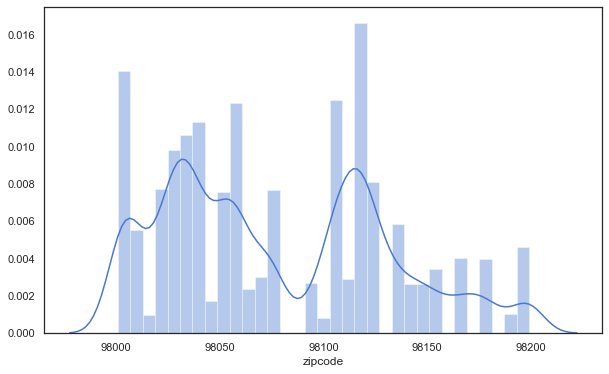

In [47]:
#Plot the distribution of zip code

plt.figure(figsize=(10, 6))
sns.distplot(df['zipcode'])

# Percentage of houses in zipcode 98150-98200

((df['zipcode']>=98150).sum())*100/21613

In [48]:
df=df.drop(columns=['id','zipcode','long','lat'])

In [49]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,6210.000000,871200.000000


In [50]:
df['grade'] = df['grade'].apply(lambda x: int(x))
df['condition'] = df['condition'].apply(lambda x: int(x))
df['floors'] = df['floors'].apply(lambda x: int(x))

In [51]:
print ((df['grade']==13).sum())
print ((df['condition']==5).sum())
print ((df['bedrooms']==33).sum())

13
1701
1


In [52]:
df.head()

,price_year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,2014,221900,3,1.00,1180,5650,1,3,7,1180,1955,1340,5650
1,2014,538000,3,2.25,2570,7242,2,3,7,2170,1951,1690,7639
2,2015,180000,2,1.00,770,10000,1,3,6,770,1933,2720,8062
3,2014,604000,4,3.00,1960,5000,1,5,7,1050,1965,1360,5000
4,2015,510000,3,2.00,1680,8080,1,3,8,1680,1987,1800,7503


<AxesSubplot:xlabel='price'>

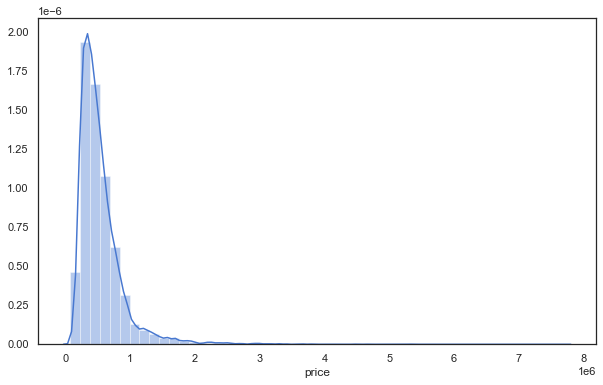

In [53]:
#Plot the distribution of MEDV

plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

<AxesSubplot:>

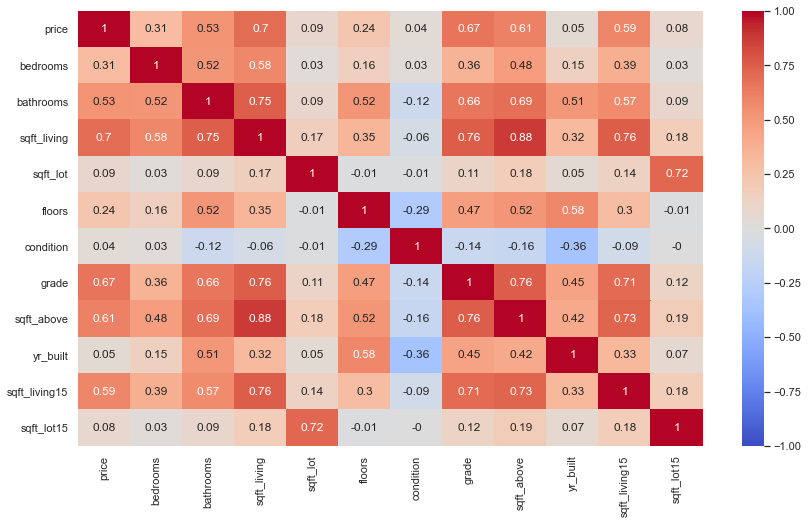

In [54]:
# Correlation matrix

plt.figure(figsize=(14, 8))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True,vmin=-1)

## Visualization

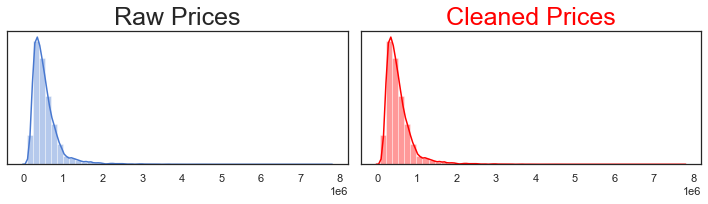

In [62]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(10, 3))



g1=sns.distplot(df[['price']],ax=axes[0])
g1.axes.set_title('Raw Prices', fontsize=25)

g2 = sns.distplot(df[['price']], color="red",ax=axes[1])
g2.axes.set_title('Cleaned Prices', fontsize=25,  color="Red")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

# We should compare the 2 distributions after cleaning outliers

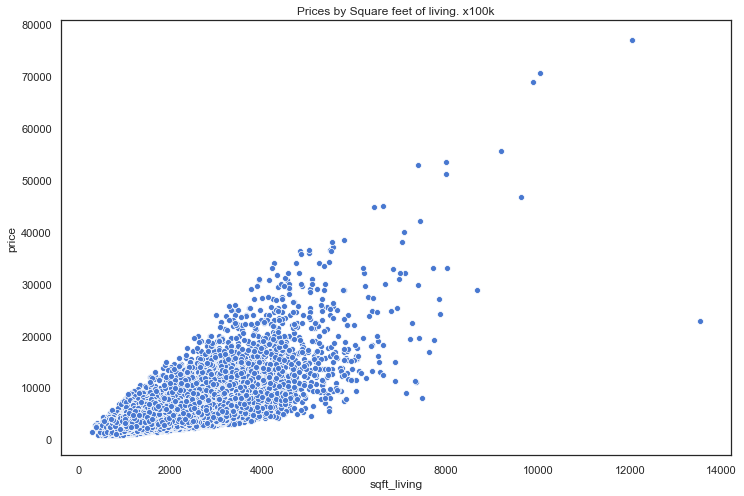

In [63]:
#Scatter plot - Clear correlation
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='sqft_living', y=data.price/100)
plt.title("Prices by Square feet of living. x100k")
plt.ticklabel_format(style="plain")

In [61]:
df.head()

,price_year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,2014,221900,3,1.00,1180,5650,1,3,7,1180,1955,1340,5650
1,2014,538000,3,2.25,2570,7242,2,3,7,2170,1951,1690,7639
2,2015,180000,2,1.00,770,10000,1,3,6,770,1933,2720,8062
3,2014,604000,4,3.00,1960,5000,1,5,7,1050,1965,1360,5000
4,2015,510000,3,2.00,1680,8080,1,3,8,1680,1987,1800,7503


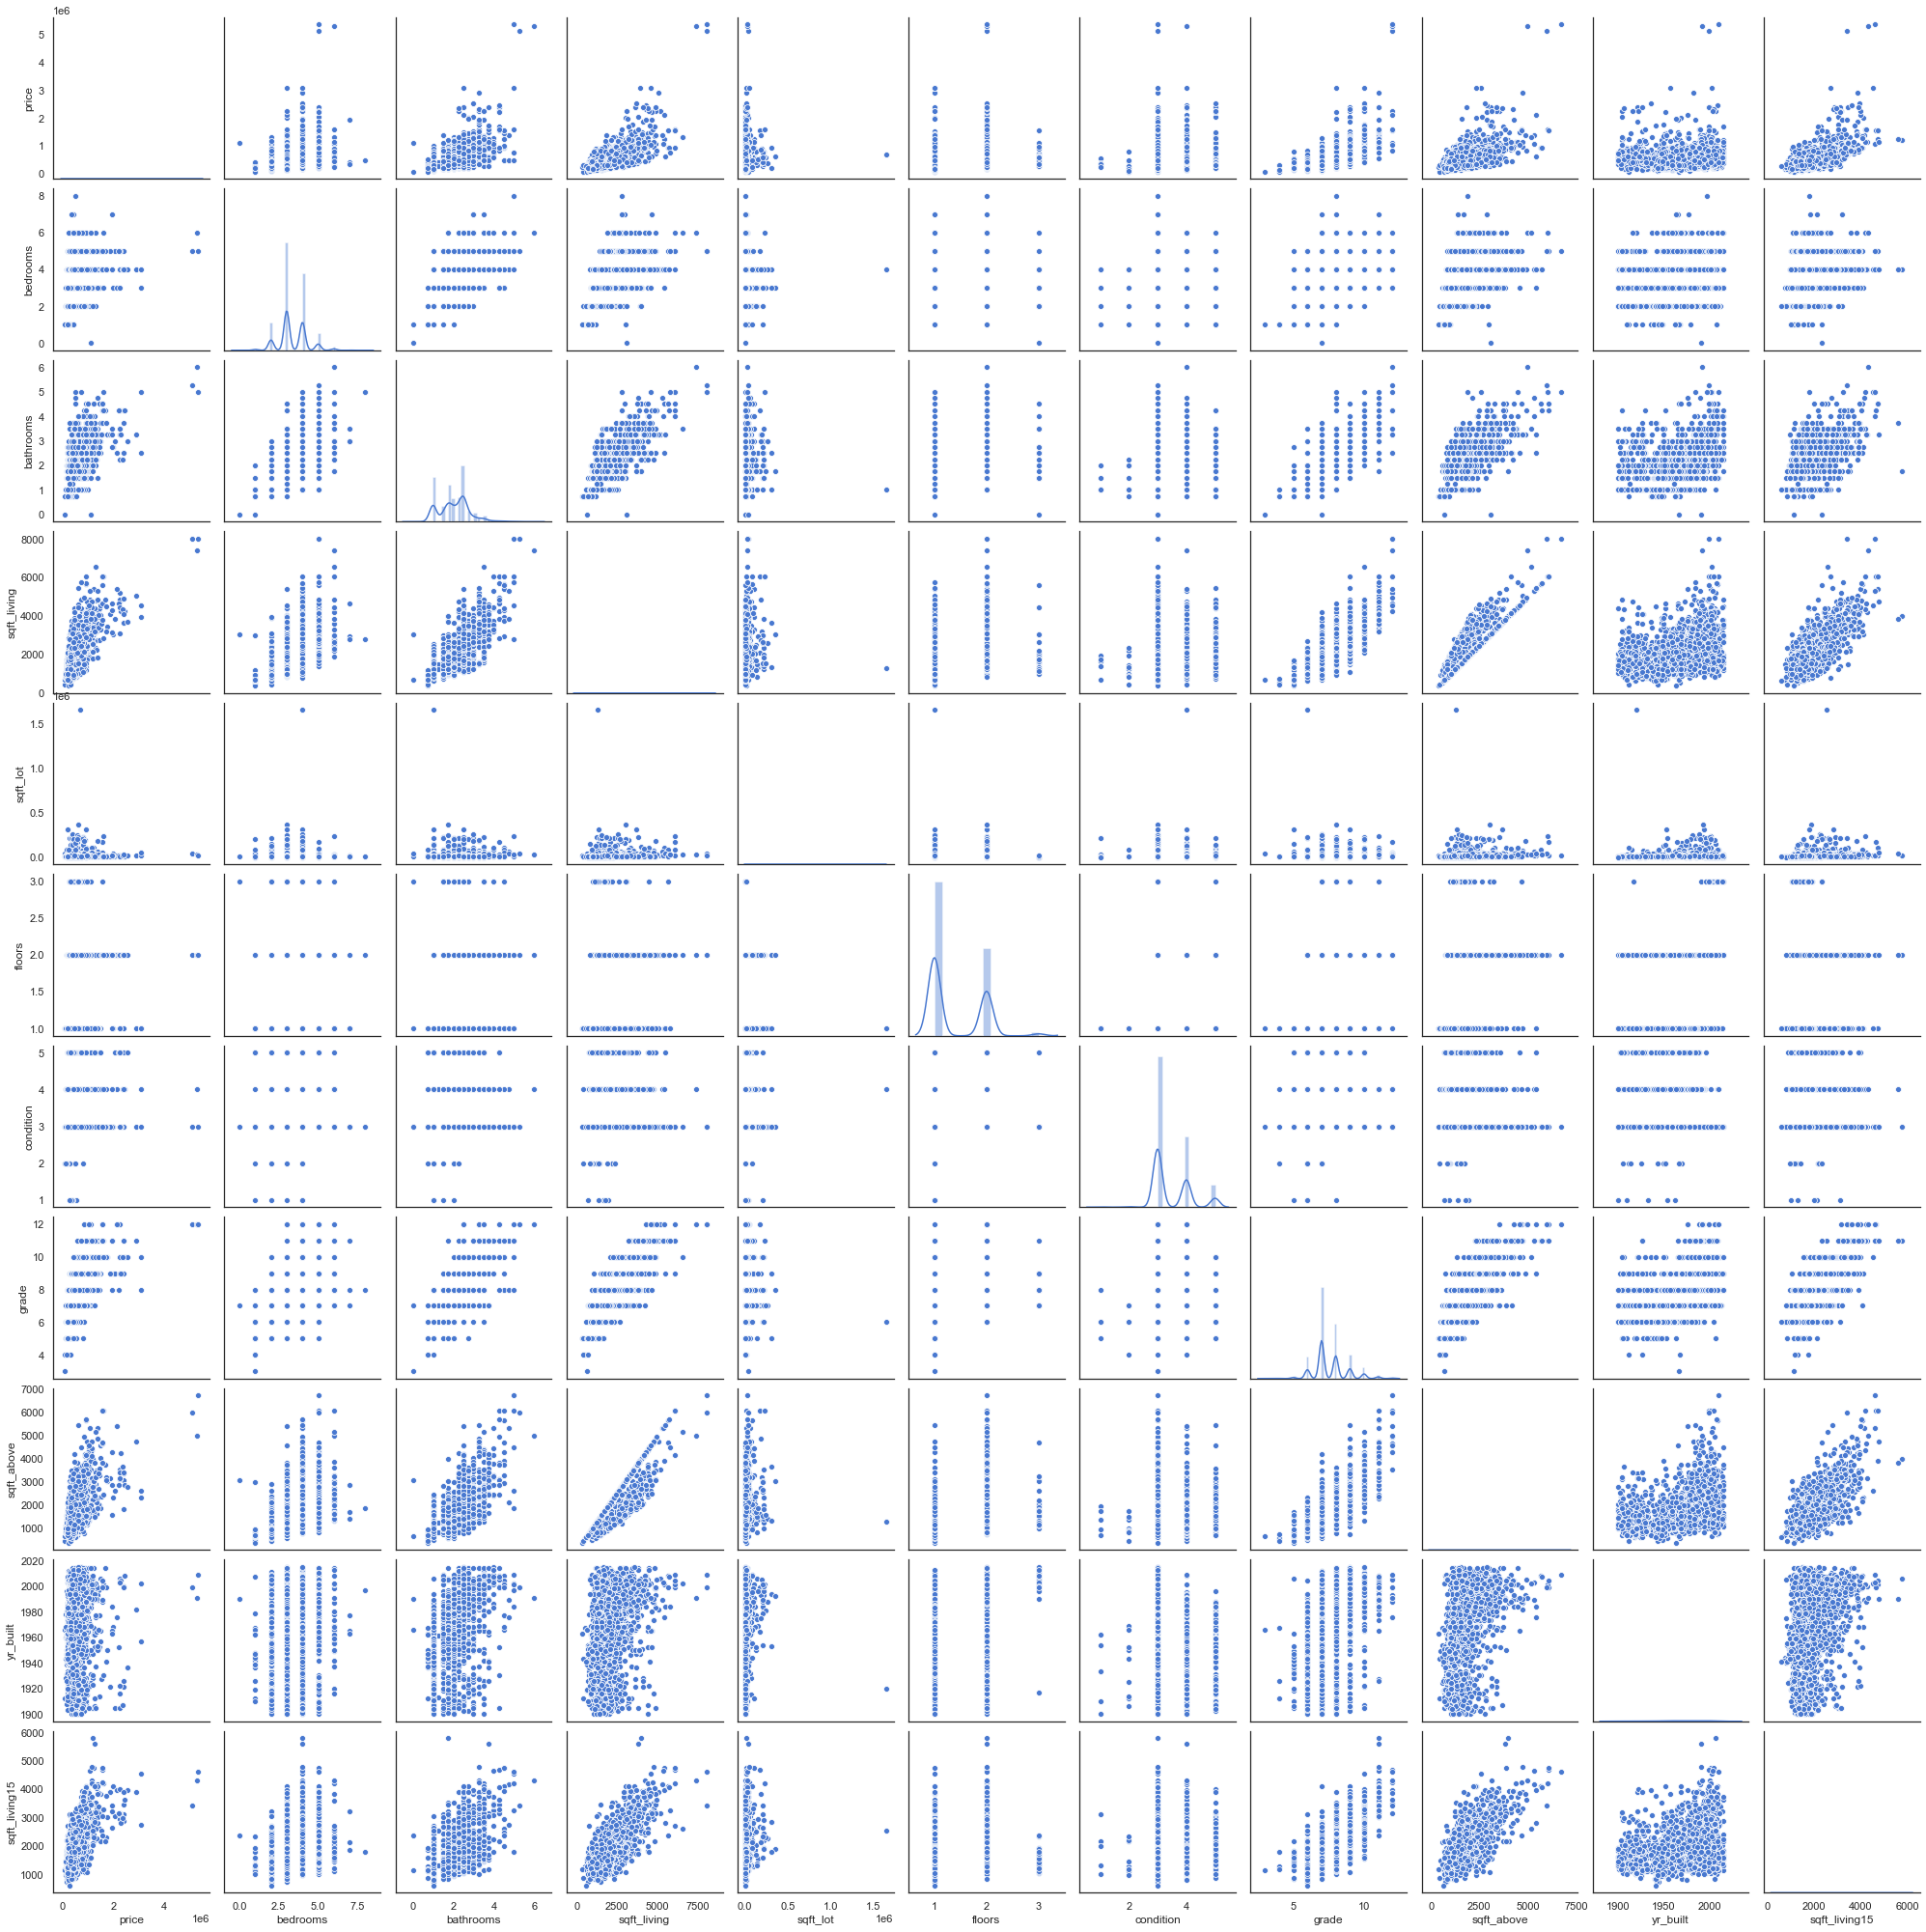

In [64]:
g = sns.PairGrid(df.iloc[:2000,1:12])
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)

In [65]:
print("Clear correlations appear, afeter data cleaning we should run again some viz")

Clear correlations appear, afeter data cleaning we should run again some viz


## Outliers Cleaning

In [ ]:
#Should use Interquartile Range to keep values of principal features

## Data Cleaning

In [ ]:
#Square feet living?
#Square feet living15?
#Some houses have up to 3 prices even for the same year, should we keep all of them?

In [67]:
#Bathrooms columns has float numbers
df.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64